<a href="https://colab.research.google.com/github/snkatrasgarh/breast_cancer_prediction_ML-/blob/main/svm_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install joblib

In [ ]:
#pip uninstall scikit-learn

In [ ]:
#!pip install scikit-learn==1.2.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import KFold,cross_val_score
my_kfold=KFold(n_splits=5)

In [ ]:
cancer=load_breast_cancer()
#print(cancer)
x=cancer.data[:,:2]
y=cancer.target
y_name=cancer.target_names
#print(y_name[y])

DATA SAMPLING OR MODEL SELECTION

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
svm_model=SVC(kernel="rbf",C=1,gamma=.5,probability=True)
svm_model.fit(x_train,y_train)

SVC(C=1, gamma=0.5, probability=True)

In [ ]:
inp=[[10,10]]
yp=svm_model.predict_proba(inp)
print(yp)
z=list(dict.fromkeys(y))
#print(z[])

[[0.15707167 0.84292833]]


In [ ]:
i=0
for t in yp[0]:
  if (t>0):
    print(str(z[i]) + ":" + str(t))
  i=i+1


0:0.15707167160591062
1:0.8429283283940892


In [ ]:
inp=[[20,20]]
yp=svm_model.predict(inp)
print(yp)
print(y_name[yp])

[0]
['malignant']


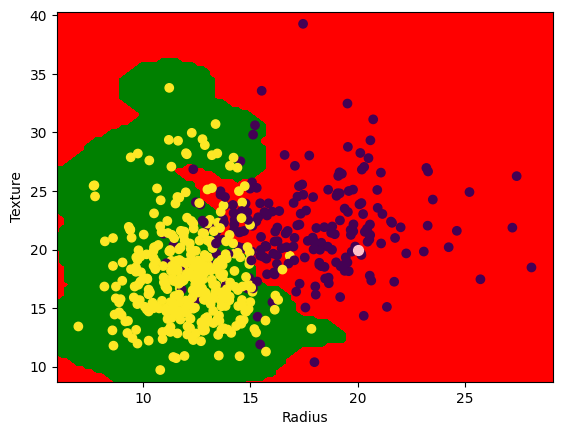

In [ ]:
import matplotlib.colors
mycolor=matplotlib.colors.ListedColormap(["red","green"])
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    svm_model,
    x,
    response_method="predict",
    xlabel="Radius",
    ylabel="Texture",
    cmap=mycolor
)
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(20,20,color="pink",s=50)

<Axes: >

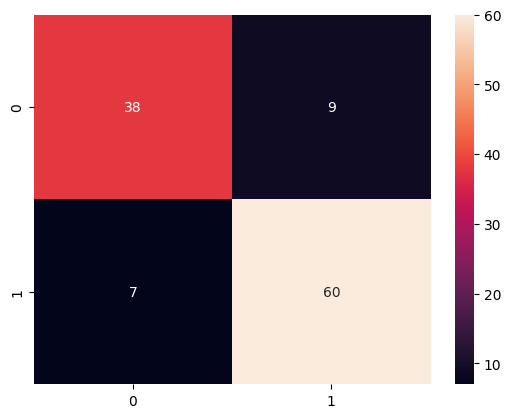

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,svm_model.predict(x_test))
sns.heatmap(cm,annot=True)

In [ ]:
ac=accuracy_score(y_test,svm_model.predict(x_test))
print(ac)

0.8596491228070176


In [ ]:
mySVMSC=cross_val_score(svm_model,x_test,y_test,cv=my_kfold)
print(mySVMSC)
print("Mean of kfold"+str(mySVMSC.mean()))


[0.69565217 0.86956522 0.91304348 0.91304348 0.86363636]
Mean of kfold0.8509881422924901


In [ ]:
joblib.dump(svm_model,"c3_Cancer.joblib")


['c3_Cancer.joblib']